# Modeling virus expansion 
inspired by https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4


Import modules which I used: 

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

import ipywidgets as wg
from IPython.display import display

Notebook shows two broudly known and easy models for virus expansion (SIR and SIRS) and two additional extended models, ones based on scientific paper: https://www.medrxiv.org/content/10.1101/2020.05.17.20104885v1, and second which I developed. For each models I have prepared short theoretical introduction, where I used such scheme:
![](../images/png_1.png)


# SIR model
![](../images/SIR.png)
### S - Susceptible
### I - Infected
### R - Recovered

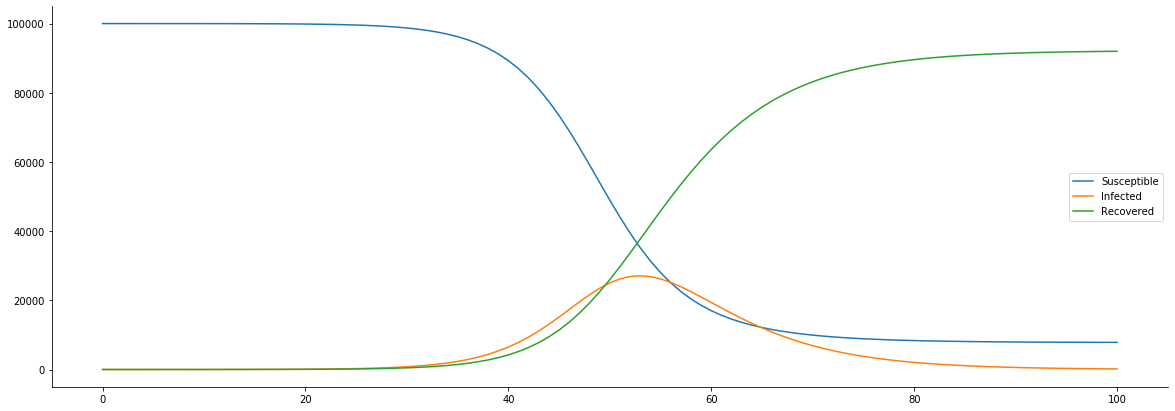

In [6]:
beta = 0.4
gamma = 0.15

s = [99999]
i = [1]
r = [0]

N = s[0] + i[0] + r[0]
D = 100

for d in range(D):
    
    ds = -beta * i[d] * s[d] / N  
    di = beta * i[d] * s[d] / N - gamma * i[d]
    dr = gamma * i[d] 

    check = s[d]+i[d]+r[d]
    assert round(check,1) == N, 'zwiększa się lub zmniejsza populacja'
    
    s.append(s[d] + ds)
    i.append(i[d] + di)
    r.append(r[d] + dr)

plt.plot(range(D+1), s, range(D+1), i, range(D+1), r)
plt.legend(['Susceptible', 'Infected', 'Recovered'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Interactive visualization:

In [7]:
def plot_SIR(D,beta,gamma,s_int,i_int):
    
    s = []
    s.append(s_int)
    i = []
    i.append(i_int)
    
    r = [0]
    N = s[0] + i[0] + r[0]
    
    for d in range(D):
        ds = -beta * s[d] * i[d] / N 
        di = beta * s[d] * i[d] / N - gamma * i[d]
        dr = gamma * i[d] 

        check = s[d]+i[d]+r[d]
        assert round(check,1) == N, 'population error'
        
        s.append(s[d] + ds)
        i.append(i[d] + di)
        r.append(r[d] + dr)
    
    plt.plot(range(D+1), s, range(D+1), i, range(D+1), r)
    plt.legend(['Susceptible', 'Infected', 'Recovered'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

layout = wg.Layout(width='980px')
style = {'description_width': 'initial'}
D_slide = wg.IntSlider(value=100, min=10, max=1000, step=10, description='Number of days in modeling',style=style,layout=layout)
beta_slide = wg.FloatSlider(value=0.4, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
gamma_slide = wg.FloatSlider(value=0.15, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
s_int_slide = wg.IntSlider(value=999, min=99, max=9999, step=1,description='Initial number of susceptible',style=style,layout=layout)
i_int_slide = wg.IntSlider(value=1, min=1, max=100, step=1,description='Initial number of infected',style=style,layout=layout)
wg.interact(plot_SIR, D=D_slide, beta=beta_slide, gamma=gamma_slide, s_int=s_int_slide, i_int=i_int_slide)

interactive(children=(IntSlider(value=100, description='Number of days in modeling', layout=Layout(width='980p…

<function __main__.plot_SIR(D, beta, gamma, s_int, i_int)>

### SIRS model
![](../images/SIRS.png)
### S - Susceptible
### I - Infected
### R - Recovered

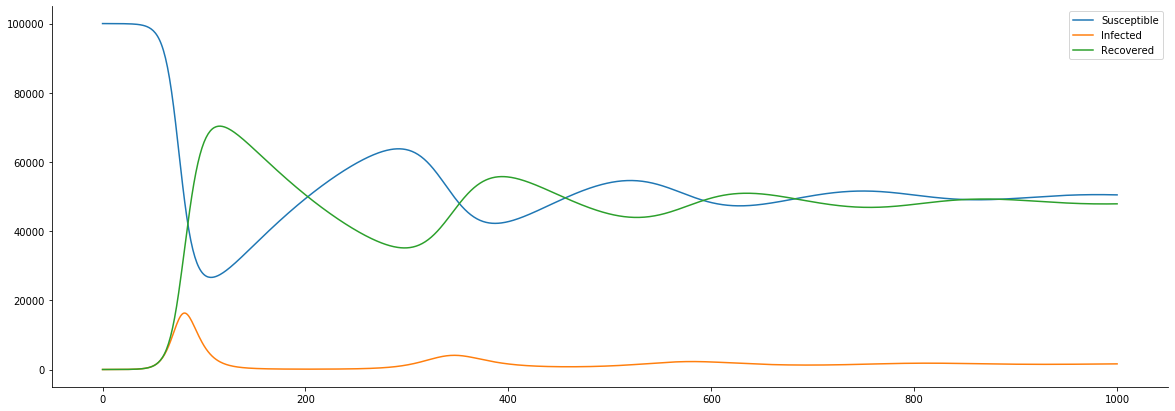

In [5]:
beta = 0.3
gamma = 0.15
ksi = 0.005

s = [99999]
i = [1]
r = [0]

N = s[0] + i[0] + r[0]
D = 1000

for d in range(D):

    ds = -beta * s[d] * i[d] / N + ksi * r[d]
    di = beta * s[d] * i[d] / N - gamma * i[d]
    dr = gamma * i[d] - ksi * r[d]

    check = s[d]+i[d]+r[d]
    assert round(check,1) == N, 'population error'
    
    s.append(s[d] + ds)
    i.append(i[d] + di)
    r.append(r[d] + dr)

plt.plot(range(D+1), s, range(D+1), i, range(D+1), r)
plt.legend(['Susceptible', 'Infected', 'Recovered'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Interactive visualization:


In [6]:
def plot_SIRS(D,beta,gamma,ksi,s_int,i_int):
    
    s = []
    s.append(s_int)
    i = []
    i.append(i_int)
    
    r = [0]
    N = s[0] + i[0] + r[0]
    
    for d in range(D):
        ds = -beta * s[d] * i[d] / N + ksi * r[d]
        di = beta * s[d] * i[d] / N - gamma * i[d]
        dr = gamma * i[d] - ksi * r[d]
        
        check = s[d]+i[d]+r[d]
        assert round(check,1) == N, 'population error'

        s.append(s[d] + ds)
        i.append(i[d] + di)
        r.append(r[d] + dr)
    
    plt.plot(range(D+1), s, range(D+1), i, range(D+1), r)
    plt.legend(['Susceptible', 'Infected', 'Recovered'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

layout = wg.Layout(width='980px')
style = {'description_width': 'initial'}
D_slide = wg.IntSlider(value=100, min=10, max=1000, step=10, description='Number of days in modeling',style=style,layout=layout)
beta_slide = wg.FloatSlider(value=0.4, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
gamma_slide = wg.FloatSlider(value=0.15, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
ksi_slide = wg.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.001, description='Ksi parameter',style=style,layout=layout)
s_int_slide = wg.IntSlider(value=999, min=99, max=9999, step=1,description='Initial number of susceptible',style=style,layout=layout)
i_int_slide = wg.IntSlider(value=1, min=1, max=100, step=1,description='Initial number of infected',style=style,layout=layout)
wg.interact(plot_SIRS, D=D_slide, beta=beta_slide, ksi=ksi_slide, gamma=gamma_slide, s_int=s_int_slide, i_int=i_int_slide)

interactive(children=(IntSlider(value=100, description='Number of days in modeling', layout=Layout(width='980p…

<function __main__.plot_SIRS(D, beta, gamma, ksi, s_int, i_int)>

### SIR+ model based on: https://www.medrxiv.org/content/10.1101/2020.05.17.20104885v1
![](../images/SIR_plus.png)
### S - Susceptible
### I - Infected
### R - Recovered
### L - Isolated
### D - Dead

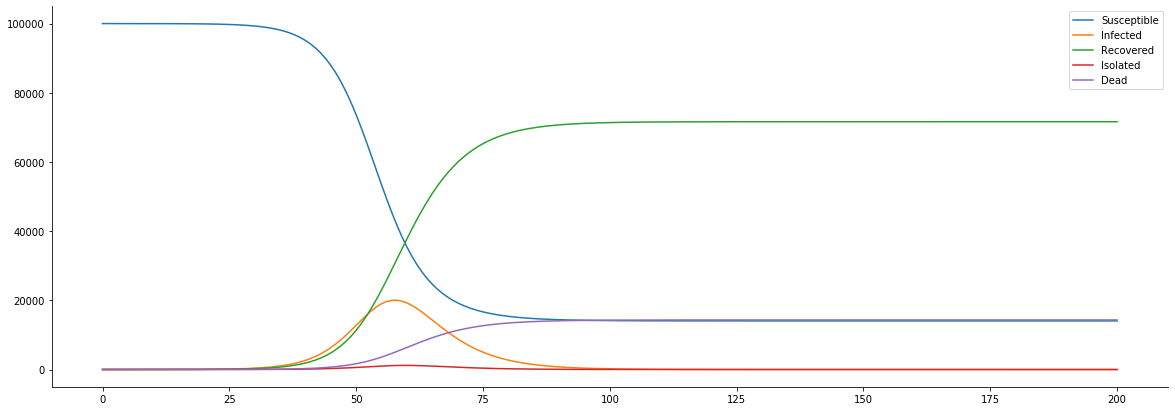

In [7]:
beta = 0.4
gamma = 0.15
theta = 0.5
alfa = 0.03

s = [99999]
i = [1]
r = [0]
l = [0]
z = [0]

N = s[0] + i[0] + r[0]
D = 200

for d in range(D):
    
    ds = -beta * s[d] * i[d] / N 
    di = beta * s[d] * i[d] / N - gamma * i[d] - alfa * i[d]
    dr = gamma * i[d] 
    dl = alfa * i[d] - theta *l[d]
    dz = theta * l[d]
    
    check = s[d]+i[d]+r[d]+l[d]+z[d]
    assert round(check,1) == N, 'Initial population is changed'
    
    s.append(s[d] + ds)
    i.append(i[d] + di)
    r.append(r[d] + dr)
    l.append(l[d] + dl)
    z.append(z[d] + dz)

plt.plot(range(D+1), s, range(D+1), i, range(D+1), r,range(D+1), l, range(D+1), z)
plt.legend(['Susceptible', 'Infected', 'Recovered','Isolated','Dead'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Interactive visualization:

In [8]:
def plot_SIR_plus(D,beta,gamma,theta,alfa,s_int,i_int):
    
    s = []
    s.append(s_int)
    i = []
    i.append(i_int)
    
 
    r = [0]
    l = [0]
    z = [0]

    N = s[0] + i[0] + r[0]


    for d in range(D):
    
        ds = -beta * s[d] * i[d] / N 
        di = beta * s[d] * i[d] / N - gamma * i[d] - alfa * i[d]
        dr = gamma * i[d] 
        dl = alfa * i[d] - theta *l[d]
        dz = theta * l[d]
        
        check = s[d]+i[d]+r[d]+l[d]+z[d]
        assert round(check,1) == N, 'Initial population is changed'
       
        s.append(s[d] + ds)
        i.append(i[d] + di)
        r.append(r[d] + dr)
        l.append(l[d] + dl)
        z.append(z[d] + dz)

    plt.plot(range(D+1), s, range(D+1), i, range(D+1), r,range(D+1), l, range(D+1), z)
    plt.legend(['Susceptible', 'Infected', 'Recovered','Isolated','Dead'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

layout = wg.Layout(width='980px')
style = {'description_width': 'initial'}
D_slide = wg.IntSlider(value=100, min=10, max=1000, step=10, description='Number of days in modeling',style=style,layout=layout)
beta_slide = wg.FloatSlider(value=0.4, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
gamma_slide = wg.FloatSlider(value=0.15, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
theta_slide = wg.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01,description='Theta parameter',style=style,layout=layout)
alfa_slide = wg.FloatSlider(value=0.03, min=0.01, max=0.1, step=0.01,description='Alfa parameter',style=style,layout=layout)
s_int_slide = wg.IntSlider(value=999, min=99, max=9999, step=1,description='Initial number of susceptible',style=style,layout=layout)
i_int_slide = wg.IntSlider(value=1, min=1, max=100, step=1,description='Initial number of infected',style=style,layout=layout)
wg.interact(plot_SIR_plus, D=D_slide, beta=beta_slide, theta=theta_slide, alfa=alfa_slide, gamma=gamma_slide, s_int=s_int_slide, i_int=i_int_slide)

interactive(children=(IntSlider(value=100, description='Number of days in modeling', layout=Layout(width='980p…

<function __main__.plot_SIR_plus(D, beta, gamma, theta, alfa, s_int, i_int)>

### SIRS_extended based on my ideas
![](../images/SIRS_ext.png)
### S - Susceptible
### E - Exposed
### I - Infected
### R - Recovered
### L - Isolated
### D - Dead

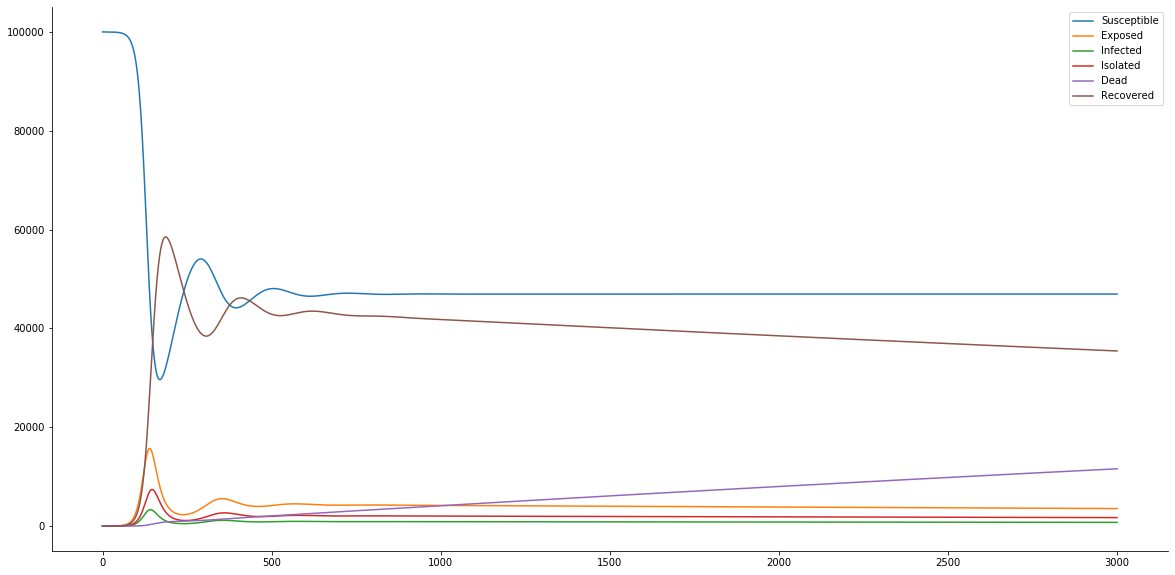

In [9]:
D = 3000       #liczba dni do symulacji
S = 99999      #liczba podatnych na chorobę
I = 1          #liczba chorych
beta = 1       #współczynnik, że ktoś spotka chorego i sie zakazi 
delta = 0.1    #okres inkubacji choroby, kiedy nie widać objawów, a wirus już sie rozmnaża
gamma = 0.5    #szybkość wyłapywania osób zainfekowanych
sigma = 0.2    #szybkość zdrowienia osoby zainfekowanej
lambda_ = 0.9  #prawdopodobieństwo, że osoba ma objawy, jest zidentyfikowana i zabrana na kwarantanne
alfa = 0.02    #wskaźnik śmiertelności spośród tych co zostali zidentyfikowani bo mieli objawy choroby
ksi = 0.01     #czas po którym osoba, która przeszła chorobę może zarazić się ponownie
rho = 0.1      #szybkość umierania odizolowanych zainfekowanych

s = [S]
e = [0]
i = [I]
r = [0]
l = [0]
d = [0]
r = [0]

N = s[0] + i[0] 

for t in range(D):

    ds = -beta * s[t] * i[t] / N + ksi*r[t]
    de = beta * s[t] * i[t] / N - delta*e[t]
    di = delta * e[t] - gamma * i[t] * lambda_ - sigma * (1-lambda_) * i[t]
    dl = gamma * i[t] * lambda_ - rho * alfa * l[t] - (1-alfa)*l[t]*sigma
    dd = rho*alfa*l[t]
    dr = (1-alfa)*l[t]*sigma + sigma *(1-lambda_)*i[t] - ksi*r[t]
    
    check = s[t]+e[t]+i[t]+r[t]+l[t]+d[t]
    assert round(check,1) == N, 'Initial population is changed'
  
    s.append(s[t] + ds)
    e.append(e[t] + de)
    i.append(i[t] + di)
    l.append(l[t] + dl)
    d.append(d[t] + dd)
    r.append(r[t] + dr)

plt.figure(figsize=(20,10))
plt.plot(range(D+1), s, range(D+1), e, range(D+1), i,  range(D+1), l, range(D+1), d, range(D+1), r)
plt.legend(['Susceptible', 'Exposed', 'Infected','Isolated','Dead','Recovered'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [8]:
def plot_SIRS_ext(D,beta,delta,gamma,sigma, lambda_, alfa, ksi, rho,s_int,i_int):
    
    s = []
    s.append(s_int)
    i = []
    i.append(i_int)
    

    e = [0]
    r = [0]
    l = [0]
    d = [0]
    r = [0]

    N = s[0] + i[0] 

    for t in range(D):

        ds = -beta * s[t] * i[t] / N + ksi*r[t]
        de = beta * s[t] * i[t] / N - delta*e[t]
        di = delta * e[t] - gamma * i[t] * lambda_ - sigma * (1-lambda_) * i[t]
        dl = gamma * i[t] * lambda_ - rho * alfa * l[t] - (1-alfa)*l[t]*sigma
        dd = rho*alfa*l[t]
        dr = (1-alfa)*l[t]*sigma + sigma *(1-lambda_)*i[t] - ksi*r[t]

        check = s[t]+e[t]+i[t]+r[t]+l[t]+d[t]
        assert round(check,1) == N, 'Initial population is changed'
        
        s.append(s[t] + ds)
        e.append(e[t] + de)
        i.append(i[t] + di)
        l.append(l[t] + dl)
        d.append(d[t] + dd)
        r.append(r[t] + dr)

    plt.figure(figsize=(20,10))
    plt.plot(range(D+1), s, range(D+1), e, range(D+1), i,  range(D+1), l, range(D+1), d, range(D+1), r)
    plt.legend(['Susceptible', 'Exposed', 'Infected','Isolated','Dead','Recovered'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()


layout = wg.Layout(width='980px')
style = {'description_width': 'initial'}

D_slide = wg.IntSlider(value=3000, min=10, max=10000, step=10, description='Number of days in modeling',style=style,layout=layout)
beta_slide = wg.FloatSlider(value=1, min=0.01, max=1, step=0.01,description='Beta parameter',style=style,layout=layout)
delta_slide = wg.FloatSlider(value=0.1, min=0.01, max=1, step=0.01,description='Delta parameter',style=style,layout=layout)
gamma_slide = wg.FloatSlider(value=0.5, min=0.01, max=1, step=0.01,description='Gamma parameter',style=style,layout=layout)
sigma_slide = wg.FloatSlider(value=0.2, min=0.01, max=1, step=0.01,description='Sigma parameter',style=style,layout=layout)
lambda__slide = wg.FloatSlider(value=0.9, min=0, max=1, step=0.01,description='Lambda parameter',style=style,layout=layout)
alfa_slide = wg.FloatSlider(value=0.02, min=0.01, max=1, step=0.01,description='Alfa parameter',style=style,layout=layout)
ksi_slide = wg.FloatSlider(value=0.01, min=0.01, max=0.1, step=0.001, description='Ksi parameter',style=style,layout=layout)
rho_slide = wg.FloatSlider(value=0.1, min=0.01, max=1, step=0.01,description='Rho parameter',style=style,layout=layout)
s_int_slide = wg.IntSlider(value=999, min=99, max=9999, step=1,description='Initial number of susceptible',style=style,layout=layout)
i_int_slide = wg.IntSlider(value=1, min=1, max=100, step=1,description='Initial number of infected',style=style,layout=layout)

wg.interact(plot_SIRS_ext, D=D_slide, beta=beta_slide, delta=delta_slide, gamma=gamma_slide, sigma=sigma_slide, lambda_=lambda__slide, alfa=alfa_slide, ksi=ksi_slide, rho=rho_slide, s_int=s_int_slide, i_int=i_int_slide)

interactive(children=(IntSlider(value=3000, description='Number of days in modeling', layout=Layout(width='980…

<function __main__.plot_SIRS_ext(D, beta, delta, gamma, sigma, lambda_, alfa, ksi, rho, s_int, i_int)>